# 1. Main Data Anaylzer
* Displays plots of features with overlap marked 
* Displays the trajectories
* Displays plots of cleaned data
* Displays plots of modified features

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os

#### Miscellaneous Functions

In [2]:
def plot(df, name, show_label):
    plt.figure(figsize=(15,5))
    plt.title(name)
    plt.plot(df.t, df[name])
    
    if show_label:
        for i in one_occurace:
            plt.scatter(df.t.loc[i], df[name].loc[i],marker='*', color='red', zorder=12, alpha=0.2)
    plt.grid()
    plt.show()

In [3]:
file_name = "/home/user/Desktop/ML/Thesis/spiral4_expanded/ep1.csv"
df = pd.read_csv(file_name)
features = ['Fx','Fy','Fz','Mx','My']
one_occurace = np.where(df.Case == 1)[0]
print(one_occurace)

[4151 4153 4154 4155 4156 4157 4158 4159 4160 4161 4162 4163 4164 4165
 4166 4167 4168 4169 4170 4171 4172 4173 4174 4175 4176 4177 4178 4179
 4180 4181 4182 4183 4184 4185 4186 4187 4188 4189 4190 4191 4192 4193
 4194 4195 4196 4197 4198 4199 4200 4201 4202 4203 4204 4205 4206 4207
 4208 4209 4210 4211 4212 4213 4214 4215 4216 4217 4218 4219 4220 4221
 4222 4223 4224 4225 4226 4227 5886 5887 5888 5889 5890 5891 5892 5893
 5894 5895 5896 5897 5898 5899 5900 5901 5902 5903 5904 5905 5906 5907
 5908 5909 5910 5911 5912 5913 5914 5915 5916]


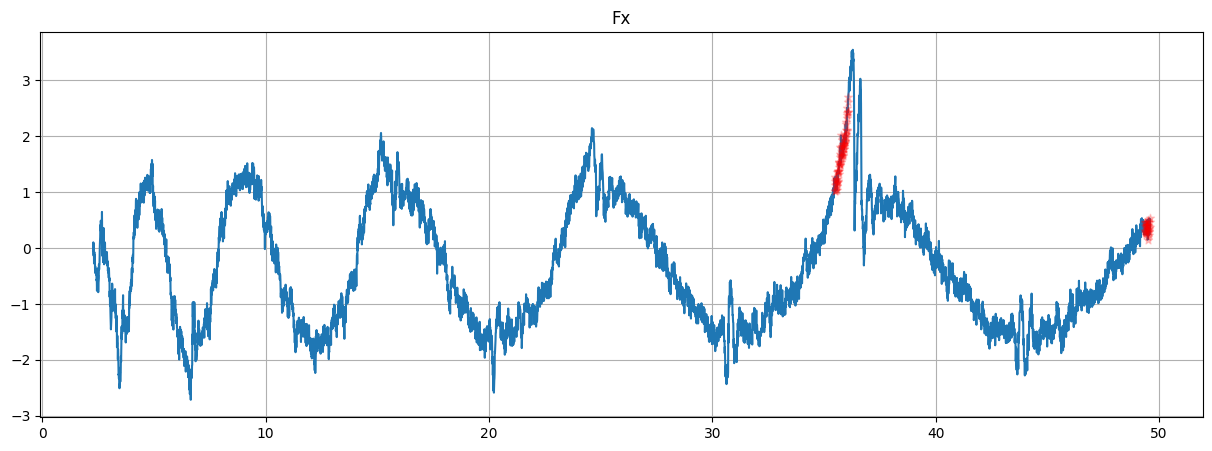

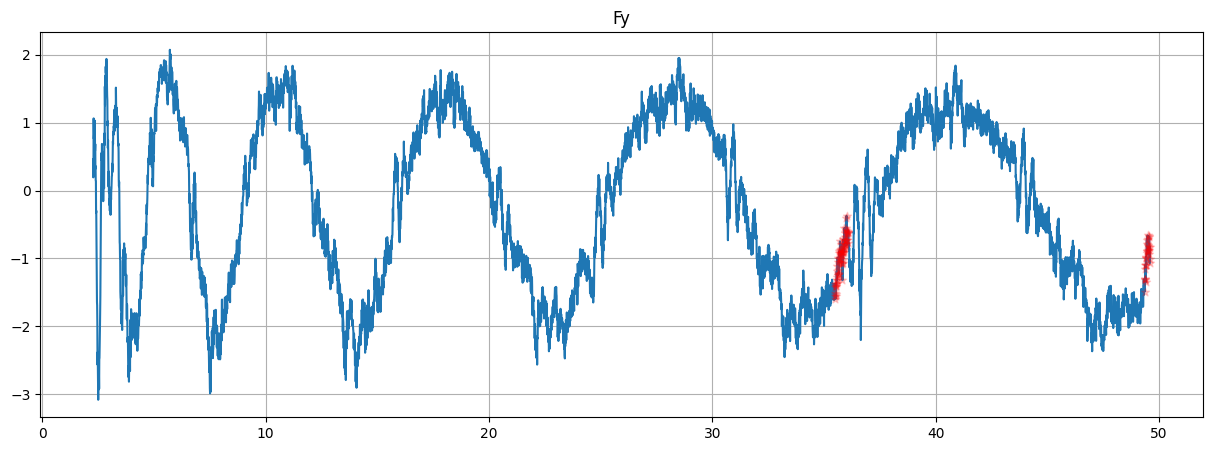

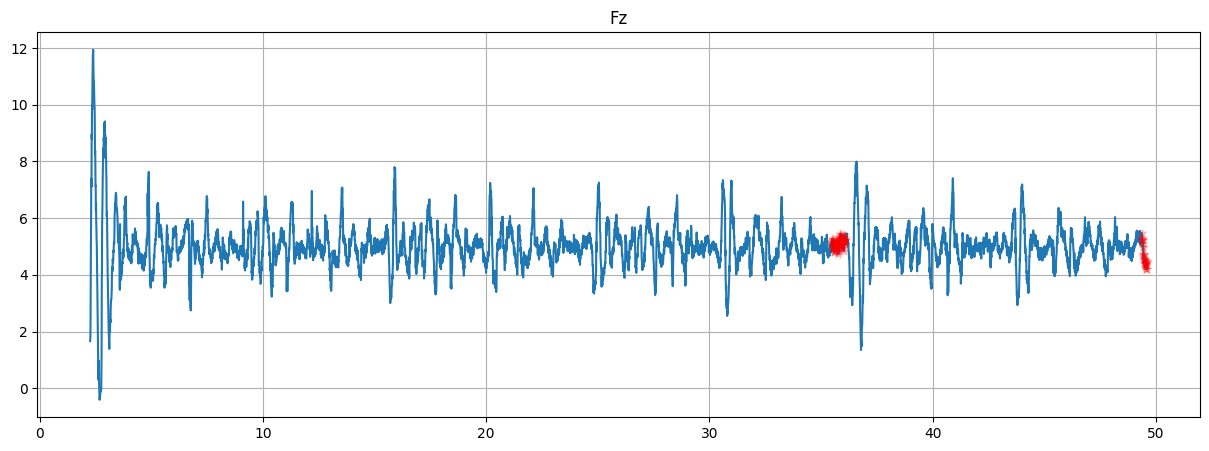

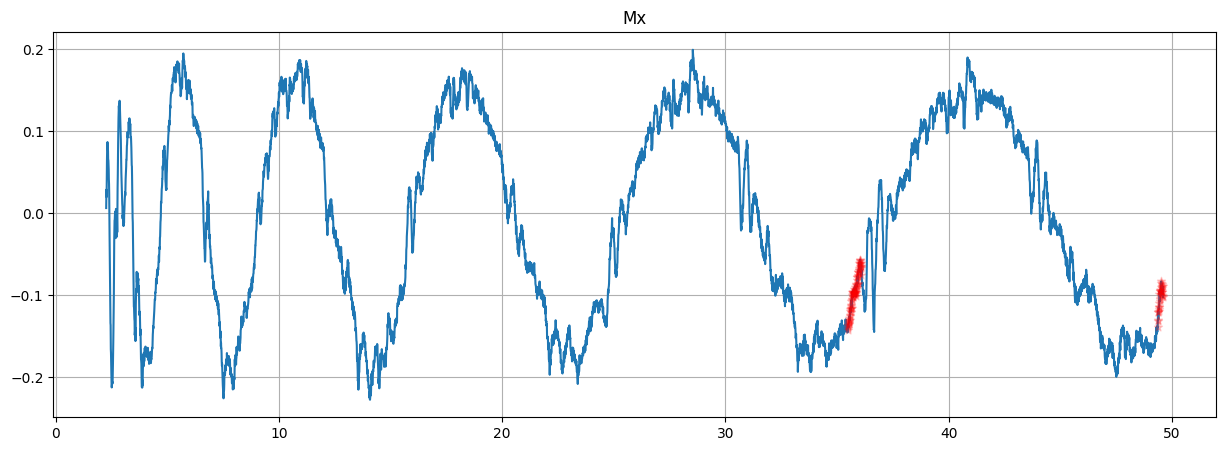

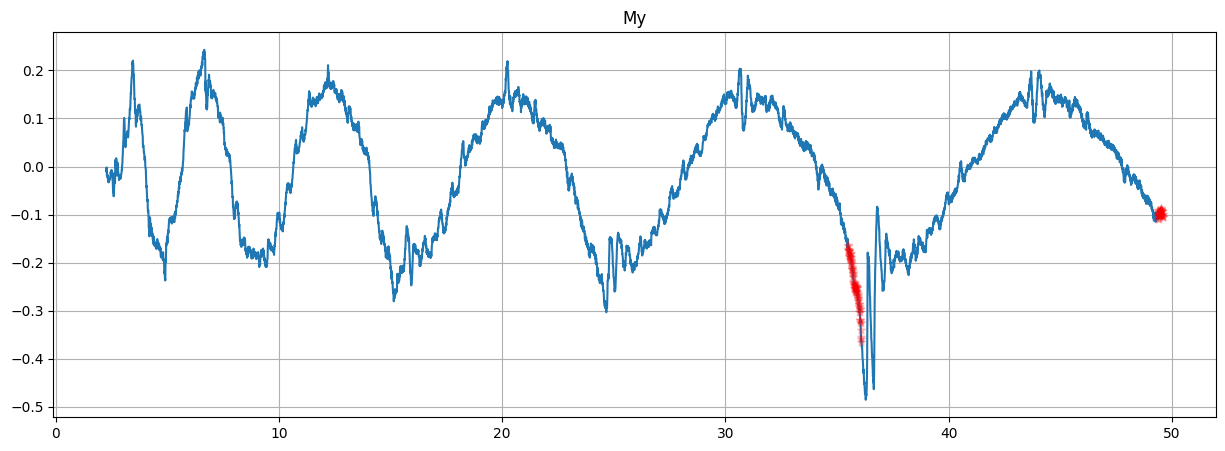

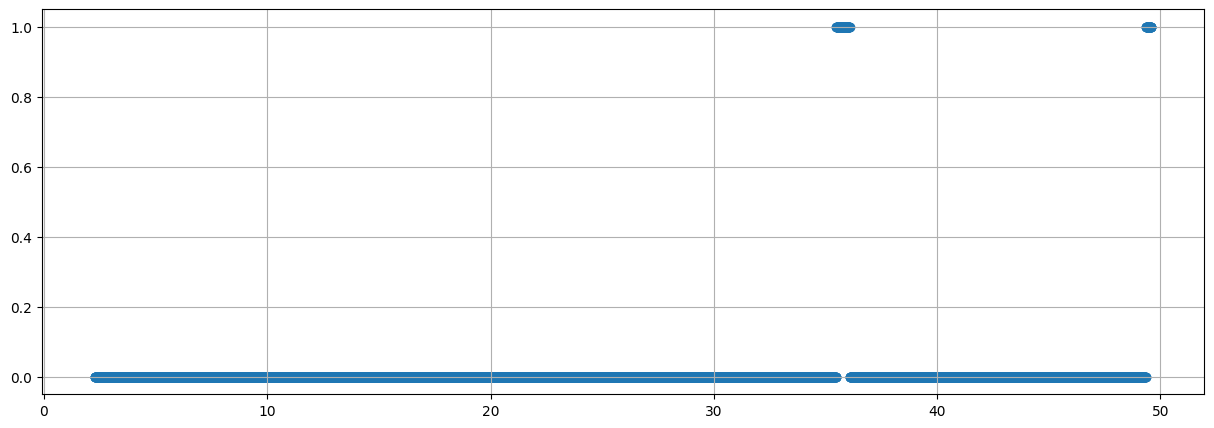

In [4]:
for f in features:
    plot(df, f, True)
    
plt.figure(figsize=(15,5))
plt.scatter(df.t, df.Case)
plt.grid()
plt.show()

In [6]:
x_hole = -0.1384
y_hole = -0.5078
# x_hole = -0.1379
# y_hole = -0.5095

theta = np.linspace(0, 2*np.pi, 100)
hole_insert_x = (0.4/1000) * np.cos(theta) + x_hole
hole_insert_y = (0.4/1000) * np.sin(theta) + y_hole
imp_insert_x = (0.8/1000) * np.cos(theta) + x_hole
imp_insert_y = (0.8/1000) * np.sin(theta) + y_hole

### Plotting spiral search based on the data

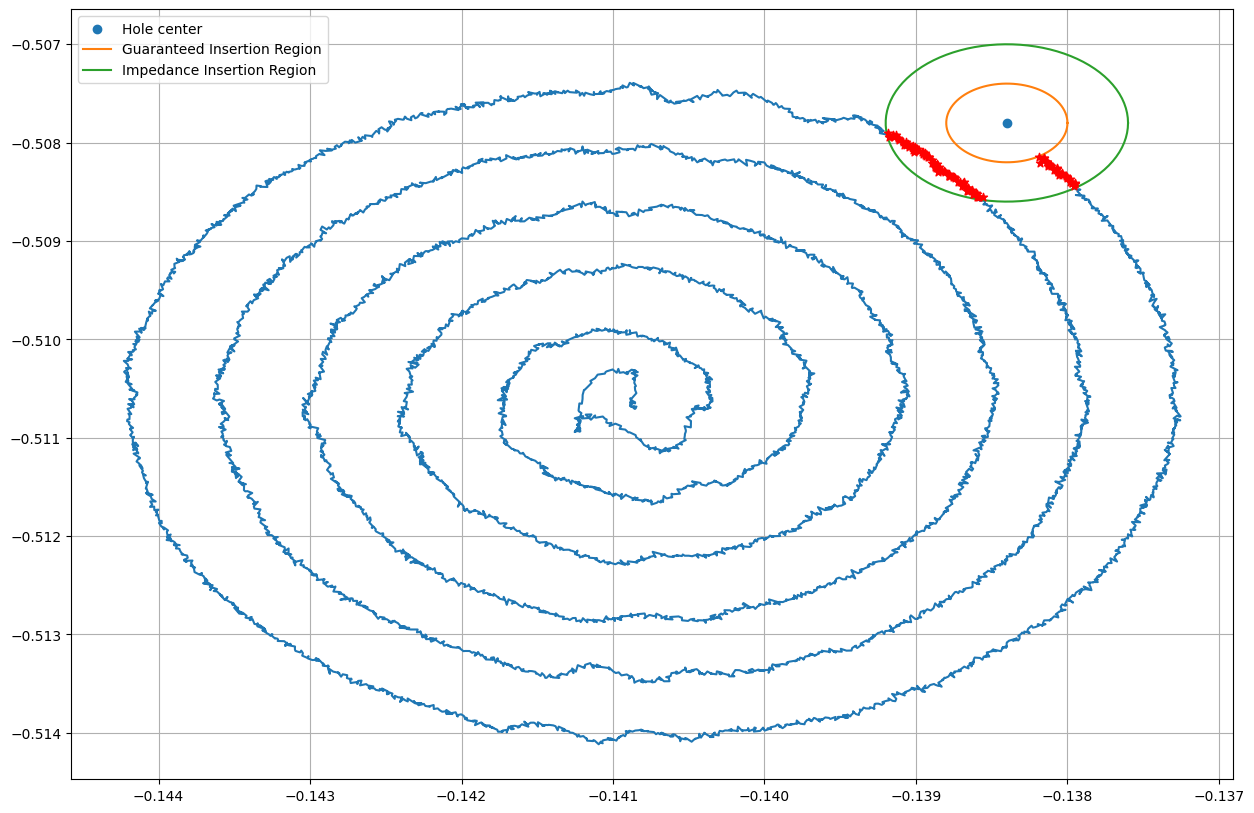

In [7]:
plt.figure(figsize=(15,10))
plt.plot(df.x,df.y)
for i in one_occurace:
    plt.scatter(df.x.loc[i],df.y.loc[i],marker='*', color='red', zorder=12)
plt.scatter(x_hole, y_hole,label='Hole center')
plt.plot(hole_insert_x,hole_insert_y,label='Guaranteed Insertion Region')
plt.plot(imp_insert_x,imp_insert_y,label='Impedance Insertion Region')
plt.grid()
plt.legend()
plt.show()


### Plotting features after cleaning

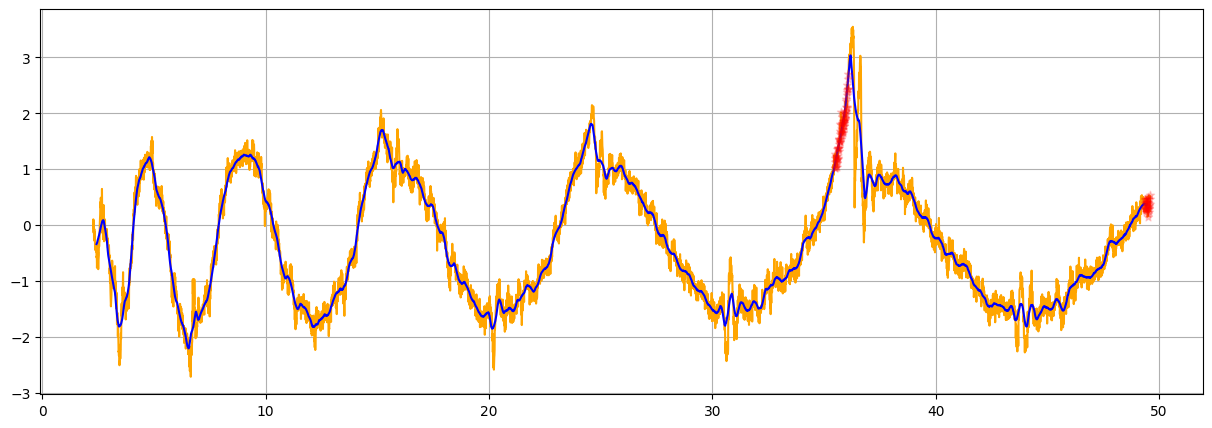

In [8]:
val = 'Fx'
show_labels = True
window = 40
df_mean = df.rolling(window).mean()
df_mean = df_mean.loc[window-1:]

plt.figure(figsize=(15,5))
plt.plot(df.t,df[val],color='orange')
plt.plot(df_mean.t, df_mean[val],color='blue')
if show_labels:
    for i in one_occurace:
        plt.scatter(df.t.loc[i], df[val].loc[i],marker='*', color='red', zorder=12, alpha=0.2)
plt.grid()
plt.show()

### Plotting modified features

In [9]:
def new_features(df):
    Fxy = np.linalg.norm(df[['Fx','Fy']].values,axis=1).tolist()
    Mxy = np.linalg.norm(df[['Mx','My']].values,axis=1).tolist()
    theta_Fxy = np.arctan2(df['Fy'], df['Fx']).tolist()
    theta_Mxy = np.arctan2(df['My'], df['Mx']).tolist()
    df.insert(2, "Fxy", Fxy, True)
    df.insert(3, "Mxy", Mxy, True)
    df.insert(4, "theta_Fxy", theta_Fxy, True)
    df.insert(5, "theta_Mxy", theta_Mxy, True)
    df = df[['Fxy','theta_Fxy','Fz','Mxy','theta_Mxy','t']]
    return df

In [10]:
df_mean_new_features = new_features(df_mean)

In [11]:
df_new_features = new_features(df)

In [12]:
df_mean_new_features.columns.tolist()

['Fxy', 'theta_Fxy', 'Fz', 'Mxy', 'theta_Mxy', 't']

In [13]:
def new_plot(val):
    plt.figure(figsize=(15,5))
    plt.title(str(val))
    plt.plot(df.t,df_new_features[val],color='orange')
    plt.plot(df_mean.t, df_mean_new_features[val],color='blue')
    if show_labels:
        for i in one_occurace:
            plt.scatter(df.t.loc[i], df[val].loc[i],marker='*', color='red', zorder=12, alpha=0.2)
    plt.grid()
    plt.show()

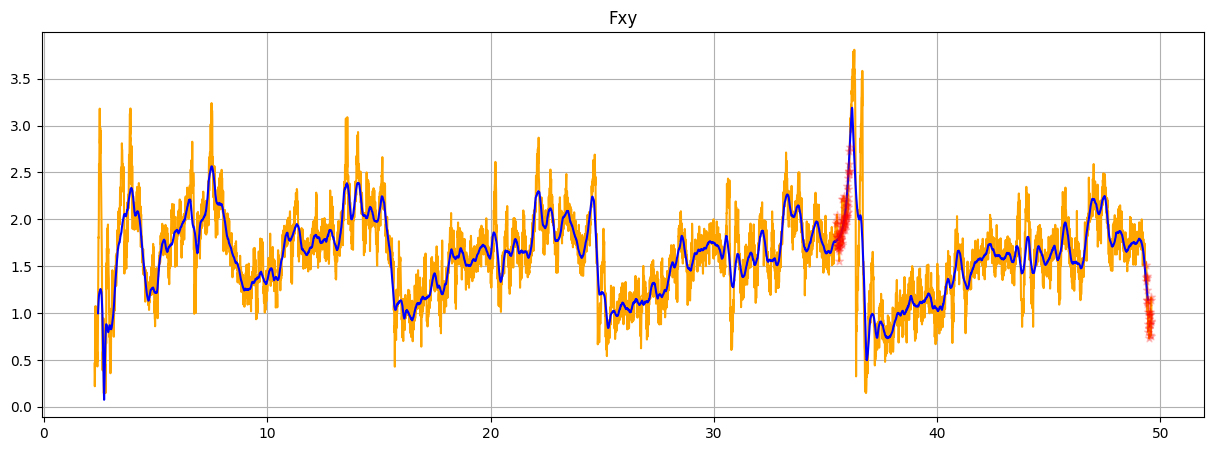

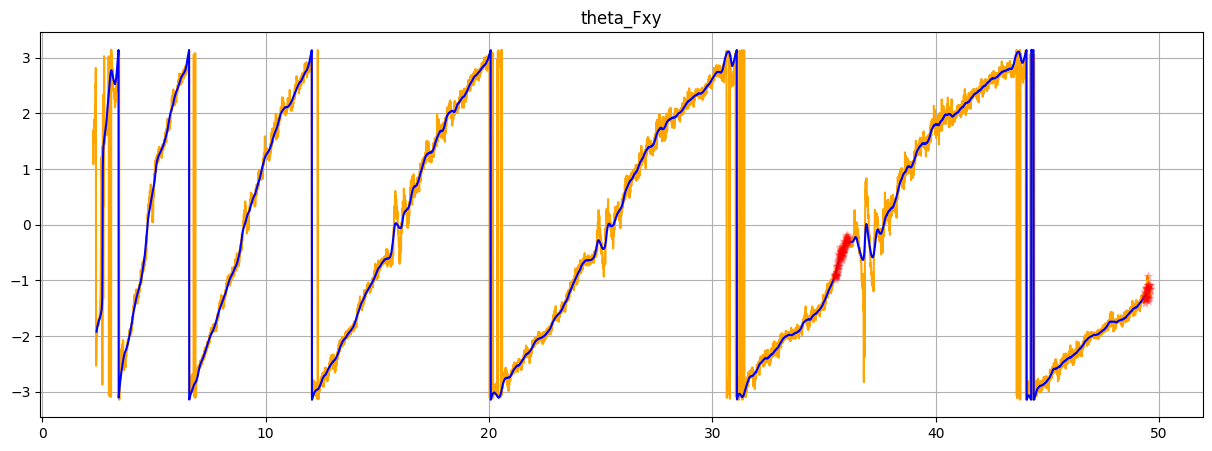

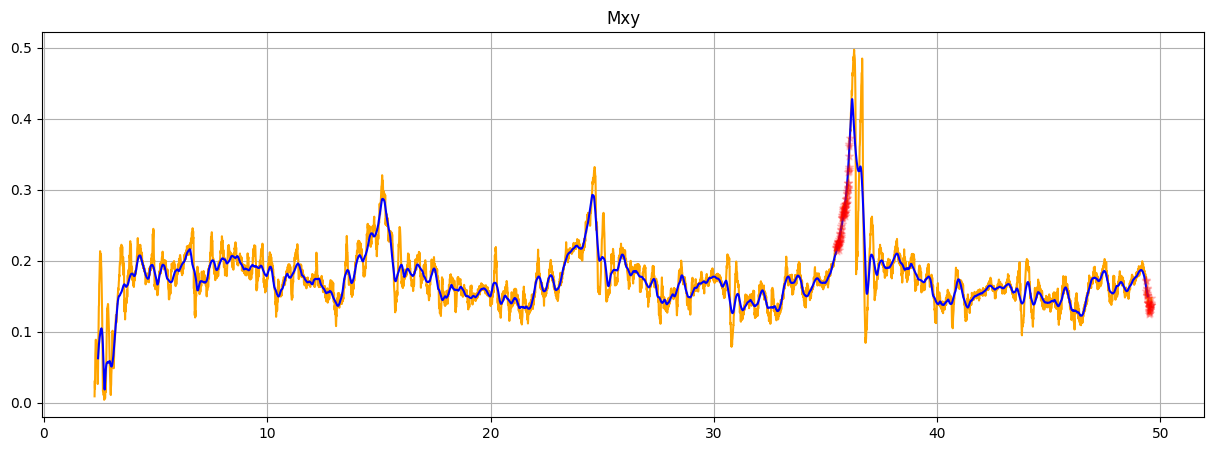

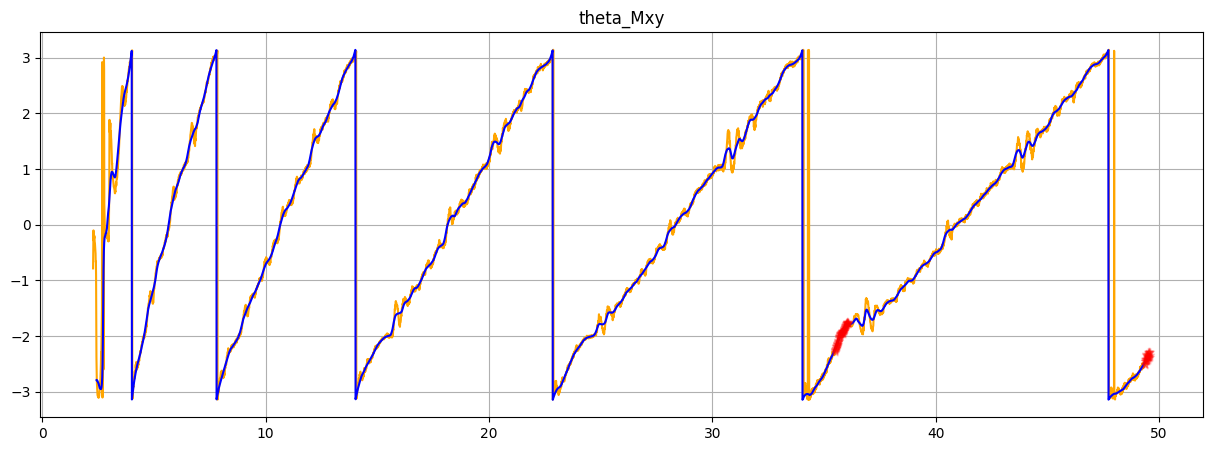

In [14]:

new_plot('Fxy')
new_plot('theta_Fxy')
new_plot('Mxy')
new_plot('theta_Mxy')

# 2. Fourier transform

6017


/home/user/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


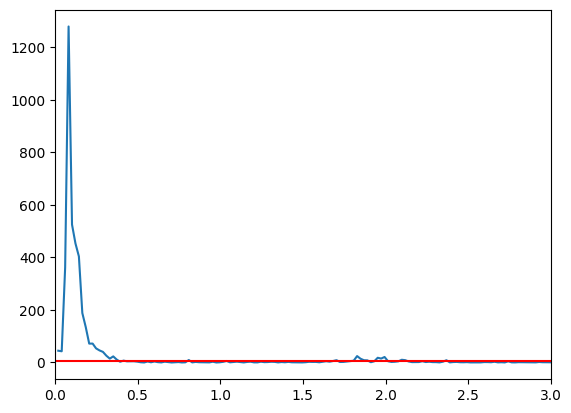

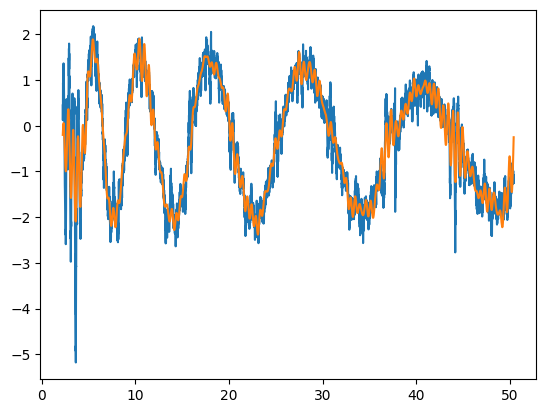

In [15]:
df_test = pd.read_csv('/home/user/Desktop/ML/Data/robotdatacollection3_part2/ep2.csv')
threshold = 7#0.09#7

f = df_test.Fy
t = df_test.t

dt = 1/125
n = len(df_test)
print(n)
fhat = np.fft.fft(f,n)  # compute FFT (complex values Fourier coefficents 
# that tells us mag/phase that is needed to transtion from one to another)
PSD = fhat * np.conj(fhat)/n # Compute Power spectrum density
freq = (1/(dt*n)) * np.arange(n) # create x-axis of frequencies
L = np.arange(1, np.floor(n/2), dtype='int')

plt.figure()
plt.plot(freq[L], PSD[L])
plt.axhline(threshold,color='r')
# plt.ylim(0,3)
plt.xlim(0,3)
plt.show()

indecies = PSD > threshold# find freq with large power
PSDclean = PSD * indecies# zero out all others
fhat = indecies * fhat # zero out small Fourier coeff in Y
ffilt = np.fft.ifft(fhat)# Inverse FFT for filtered time signal

plt.plot(t,f)
plt.plot(t,ffilt)
plt.show()

In [16]:
def fft_denoiser(x, n_components, to_real=True):
    """Fast fourier transform denoiser.
    
    Denoises data using the fast fourier transform.
    
    Parameters
    ----------
    x : numpy.array
        The data to denoise.
    n_components : int
        The value above which the coefficients will be kept.
    to_real : bool, optional, default: True
        Whether to remove the complex part (True) or not (False)
        
    Returns
    -------
    clean_data : numpy.array
        The denoised data.
        
    References
    ----------
    .. [1] Steve Brunton - Denoising Data with FFT[Python]
       https://www.youtube.com/watch?v=s2K1JfNR7Sc&ab_channel=SteveBrunton
    
    """
    n = len(x)
    
    # compute the fft
    fft = np.fft.fft(x, n)
    
    # compute power spectrum density
    # squared magnitud of each fft coefficient
    PSD = fft * np.conj(fft) / n
    
    # keep high frequencies
    _mask = PSD > n_components
    fft = _mask * fft
    
    # inverse fourier transform
    clean_data = np.fft.ifft(fft)
    
    if to_real:
        clean_data = clean_data.real
    
    return clean_data

In [17]:
denoised = fft_denoiser(df.Fy.values, 50)

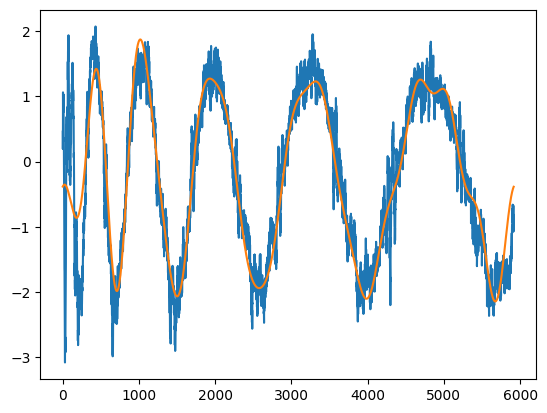

In [18]:
plt.plot(df.Fy)
plt.plot(denoised)

# 3. Connecting two datasets into one

In [ ]:
# df = pd.DataFrame()
# df_1 = pd.read_csv('./spiral/300_eps.csv')
# df_2 = pd.read_csv('./spiral/50_spiral3.csv')
# df = pd.concat([df, df_1], ignore_index=True)
# df = pd.concat([df, df_2], ignore_index=True)
# filename = "350_data.csv"
# filepath = os.path.join('./spiral/', filename)
# df.to_csv(filepath)
# print('Done')

# 4. Actions based on specific indecies

In [19]:
train_indeces = [3, 4, 9, 10, 
                 12, 13, 14, 15, 18, 19, 20, 
                 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 
                 34, 35, 37, 38, 39, 
                 41, 42, 43, 44, 45, 46, 47, 48, 49, 
                 51, 52, 54, 56, 57, 58, 59, 60, 
                 61, 62, 63, 64, 65, 66, 67, 68, 70, 
                 71, 72, 73, 75, 77, 78, 79, 80, 
                 83, 84, 86, 87, 88, 89, 90, 
                 91, 92, 93, 94, 95, 96, 98, 
                 101, 103, 104, 109, 110, 
                 111, 112, 113, 114, 116, 117, 118, 119, 120, 
                 121, 123, 124, 125, 127, 128, 129, 130]

test_indecies = [1, 2, 5, 6, 7, 11, 17, 32, 33, 36, 82, 85, 102, 105, 106, 107, 108, 115, 122, 126]
deleted_indecies = [8, 16, 31, 40, 50, 53, 55, 69, 74, 76, 81, 97, 99, 100]

### Data Merging for classifier, where first X seconds is cut out

In [20]:
testing_ideces = [1,2,3,4,6,7,8,10,15,17,22,24,25,28,30,32,33,34,38,40,41,44,
                  43,46,47,52,53,54,60,62,66,68,70,71,73,77,82,84,90,92,97,98]

In [ ]:
"""Code responsible for merging datasets"""
df = pd.DataFrame()

for i in range(10, 100+1):#testing_ideces:# 
    file_name = "./robotdatacollection3_part2/ep{}.csv".format(i)
    print(file_name)
    df_temp = pd.read_csv(file_name)
    df_new = df_temp.loc[625:] # ignoring first 5 sec 
    df = pd.concat([df, df_new], ignore_index=True)

filename = "classifier_90.csv"
filepath = os.path.join('./Thesis/', filename)
df.to_csv(filepath)
print('Done')

# 6. Fixing Labels using code

In [ ]:
# def calculate_error(x, y):
#     error = np.sqrt((x - x_hole) ** 2 + (y - y_hole) ** 2)
#     return error

# error_threshold = 0.0008

# """Updates labels!"""

# for i in range(1, 130+1):
#     file_name = "./Thesis/spiral4/ep{}.csv".format(i)
#     print(file_name)
#     df = pd.read_csv(file_name)
#     errors = df.apply(lambda row: calculate_error(row['x'], row['y']), axis=1)

#     # Update the label values based on the errors
#     df.loc[errors < error_threshold, 'Case'] = True
#     one_occurace = np.where(df.Case == 1)[0]
# #     print(one_occurace)
    
# #     print(df.Case.value_counts())
#     file_name2 = "./Thesis/spiral4_expanded/ep{}.csv".format(i)
#     df.to_csv(file_name2)
    
# #     print('Done')

# 7. Connecting dataframes together while cutting off first X seconds, and ending at first instance of an overlap to collect only normal data

In [ ]:

"""Code responsible for merging datasets"""
df = pd.DataFrame()
# loop through file names
# for i in range(1, 101):
for i in train_indeces: #range(1, 130+1):
    file_name = "./Thesis/spiral4_expanded/ep{}.csv".format(i)
    df_temp = pd.read_csv(file_name)
    start_idx = df_temp.index[df_temp['Case'].diff() == 1].tolist()
    print(i)
    if start_idx == []:
        df_new = df_temp.loc[625:] # ignoring first 5 sec
    else:
        first_idx = start_idx[0]
        df_new = df_temp.loc[625:first_idx-1] # ignoring first 5 sec amd all 1 labels
    df = pd.concat([df, df_new], ignore_index=True)

filename = "training_spiral.csv"
filepath = os.path.join('./Thesis/', filename)
df.to_csv(filepath)
print('Done')

In [ ]:
file_name = "./Thesis/training_spiral.csv"
df_temp = pd.read_csv(file_name)

In [ ]:
df_temp.Fy.plot()